<a href="https://colab.research.google.com/github/IfrazQazi/Book-Recommendation-System/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**
##**Problem Statement**
## During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
##In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
##Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## Content
## The Book-Crossing dataset comprises 3 files.
##● Users
##Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.
## ● Books
## Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.
##● Ratings
##Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [ ]:
#Importing libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading data

In [ ]:
## loading book data set
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Books.csv')

In [ ]:
## loading users data set
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Users.csv')

In [ ]:
## loading Ratings data set
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book Recommendation system/Ratings.csv')

## Lets check Book data set

In [ ]:
books.shape

(271360, 8)

## books data set is having shape of 271360 observation 8 columns.

In [ ]:
print("Columns: ", list(books.columns))
books.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


## **Observation**
* we can see that ISBN is unique book number
* 242135 unique book Title 
* 102023 Book author 
* Year of publication  is having 202 unique years
* 16807 Publisher
* we can see that 3 columns belongs to image URL 
* Image URL S and Image URL M is having same number of unique URL but Image URL L is having less number of URL as compare to Image URL S and M

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
## Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
books.loc[books['Book-Title']==books.iloc[187689,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [ ]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
books.loc[books['Book-Title']==books.iloc[128890,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [ ]:
books.loc[books['Book-Title']==books.iloc[129037,1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [ ]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [ ]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [ ]:
# checking null values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

## We can see in the Year-Of-Publication column there is some string values in it. 
##So lets check it 

In [ ]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


##As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [ ]:
#making required corrections as above, keeping other fields intact

books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [ ]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [ ]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
books['Year-Of-Publication'].describe()

count    271360.000000
mean       1959.761273
std         257.992836
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

## we can see the minimum year of publication is 0 and maximum is 2050 which is not possible

In [ ]:
# lets check how many values of year of publication are greater than 2022 years
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   13
Book-Title             13
Book-Author            13
Year-Of-Publication    13
Publisher              13
dtype: int64

In [ ]:
# lets check how many values of year of publication are equal to zero
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   4618
Book-Title             4618
Book-Author            4618
Year-Of-Publication    4618
Publisher              4618
dtype: int64

##So, we can see that there are 13 values which are greater than 2022 and 4618 values which are equal to zero in year of publication column which we have to treat before moving ahead.

In [ ]:
books['Year-Of-Publication'].mode()

0    2002
dtype: int64

In [ ]:
# lets replace all values of year of publicaion which are greater than 2021 and equal to zero with maximum number of years
books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = 2002


In [ ]:
# now lets verify if there any value greater than 2022
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
# similarly lets verfy if there and value equal to zero in year of publication column
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

## Now our Year Of Publication feature doesnt have any unnecessary values

In [ ]:
books.duplicated().sum()

0

## books data set doesnt have any duplicate values

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


## **Visualization:**


## Top 10 publisher

In [ ]:
# creating dataframe for top 10 publisher
order=pd.value_counts(books['Publisher']).iloc[:10].reset_index().rename(columns={'index':'Publisher','Publisher':'Count'}).sort_values(by='Count',ascending=True)

In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= order.Count,y=order.Publisher,orientation=None , width=650, height=450,
              text_auto=True,color=order.Publisher
             )
fig.update_layout(
    title='Top 10 Publishers',
    xaxis_title="Count",
    yaxis_title="Publisher",
    template="plotly_dark",
    
)
fig.show()

## From the graph above we can see the top 10 publishers and among them Harlequin publishers are the publishers of most books

## Top 10 Book Author

In [ ]:
# creating dataframe for top 10 Author
author=pd.value_counts(books['Book-Author']).iloc[:10].reset_index().rename(columns={'index':'Author','Book-Author':'Count'}).sort_values(by='Count',ascending=True)

In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= author.Count,y=author.Author,orientation=None , width=650, height=450,
              text_auto=True,color=author.Author
             )
fig.update_layout(
    title='Top 10 Author',
    xaxis_title="Count",
    yaxis_title="Author",
    template="plotly_dark",
    
)
fig.show()

## From the graph above we can see the top 10 Author

In [ ]:
year_book=books['Year-Of-Publication'].value_counts().reset_index().rename(columns={'index':'Year','Year-Of-Publication':'Count'}).sort_values(by='Year',ascending=False)


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=year_book.Year, y=year_book.Count,
                
                marker_color='crimson',
                name='expenses'))
fig.update_layout(
    
    width=1000, height=450,
    title='Number of book publish per year',
    xaxis_title="Year",
    yaxis_title="Number of Books",
    template="plotly_dark",
    
)
fig.show()

## From the above graph we can see that most of the books are published between 1980-2000

## Users Dataset Pre-processing

In [ ]:
print("Columns: ", list(users.columns))
users.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
## Checking null values
print(users.isna().sum())   

User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## We can see some invalid data in age column
## minimum age is 0 and Maximum is 244

## We assume that for reading a book age should be between 10-90

In [ ]:
# mean of age between 10-90
users.loc[(users['Age']<=90)&(users['Age']>=10),['Age']].mean().round()

Age    35.0
dtype: float64

## Replacing outliers and filling Null values with mean

In [ ]:
users.loc[users['Age'] > 90, 'Age'] = 35    #outliers with age grater than 90 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = 35    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(35)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

##Age Distribution

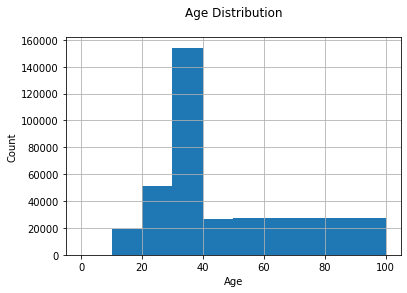

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Let's find our unique value in Location column

In [ ]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users.Location.nunique()

57339

In [ ]:
## Extracting  city state and country from location column

list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)
temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [ ]:
users.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [ ]:
# checking duplicate values
users.duplicated().sum()

0

## users data set doesnt have any null values and duplicate values
## We succefully cleaned our Users data set so lets move forward

## **Visualization:**

In [ ]:
# top 10 Country 
country_count=users['Country'].value_counts()[:10].reset_index().rename(columns={'index':'country','Country':'count'}).sort_values(by='count',ascending=False)

In [ ]:
## top 10 country based on number of readers
fig = px.histogram(x= country_count['country'],y=country_count['count'],orientation=None , width=650, height=450,
              text_auto=True, color=country_count['country']
             )
fig.update_layout(
    title='Top 10 Country having highest number of reader',
    xaxis_title="country",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## as we can see from above plot most of the readers are from USA

## Lets see Top 10 state of USA having highest number of readers

In [ ]:
# top 10 State of USA
state_usa=users.loc[users['Country']=='usa',['State']].value_counts()[:10].reset_index().rename(columns={0:'count'})


In [ ]:
## top 10  States of USA based on number of readers
fig = px.histogram(x= state_usa['State'],y=state_usa['count'],orientation=None , width=650, height=450,
              text_auto=True, color=state_usa['State']
             )
fig.update_layout(
    title='Top 10 States of USA having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## From above plot we can see that in USA california is having highest number of readers

## lets see Top 10 city of California which is having highest number of readers

In [ ]:
## Top 10 cities
cities=users.loc[(users['State']=='california'),['City']].value_counts()[:10].reset_index().rename(columns={0:'count'})

In [ ]:
fig = px.histogram(x= cities['City'],y=cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=cities['City']
             )
fig.update_layout(
    title='Top 10 cities of USA having highest number of reader',
    xaxis_title="cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## In USA San diego  is having highest number of reader followed by san francisco and Los Angeles

## lets see worldwide which is state is having highest number of readers


In [ ]:
## top 10 States of world based on number of readers
top_10_states=users['State'].value_counts()[:10].reset_index().rename(columns={'index':'state','State':'count'})

In [ ]:
# plot for top 10 state
fig = px.histogram(x= top_10_states['state'],y=top_10_states['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_states['state']
             )
fig.update_layout(
    title='Top 10 State in the World having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## here we can see that California is stil having highest number of reader

## Lets see world wide which city is having highest number of reader

In [ ]:
# top 10 cities of world based on number of readers
top_10_cities=users['City'].value_counts()[:10].reset_index().rename(columns={'index':'city','City':'count'})

In [ ]:
# plot for top 10 Cities
fig = px.histogram(x= top_10_cities['city'],y=top_10_cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_cities['city']
             )
fig.update_layout(
    title='Top 10 Cities in the World having highest number of reader',
    xaxis_title="Cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

## Here we can see that unlike cities in the United States, we have the largest number of readers here in London, followed by Barcelona.

##Books-Ratings Dataset Pre-processing:

In [ ]:
print("Columns: ", list(ratings.columns))
ratings.head(3)

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
## checking shape of ratings data
ratings.shape

(1149780, 3)

## we can see the shape of **ratings** data set is 1149780 observation and 3 features

##Ratings dataset should have books only which exist in our books dataset

In [ ]:
ratings = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape

(1031136, 3)

In [ ]:
## Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## ratings data set doesnt have any null values

In [ ]:
## checking duplicate values in ratings data set
ratings.duplicated().sum()

0

## ratings data set doesnt have any duplicate values

In [ ]:
# Renaming feature name
ratings.rename(columns={'Book-Rating':'rating'},inplace=True)

In [ ]:
print(sorted(ratings.rating.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Book rating is between 0-10

In [ ]:
ratings['rating'].describe()

count    1.031136e+06
mean     2.839051e+00
std      3.854157e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

## **Visulization :**

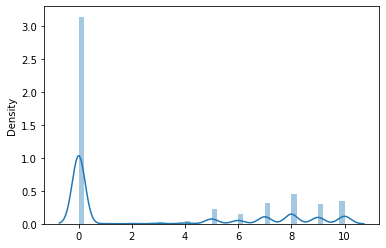

In [ ]:
sns.distplot(x=ratings['rating'], hist= True)

## Let's see how many users have rated more than 100 books

In [ ]:
rate=ratings['User-ID'].value_counts()>100

In [ ]:
rate[rate].shape

(1648,)

## We can see that 1648 users have rated more than 100 books

In [ ]:
rate2=rate[rate].index

In [ ]:
ratings[ratings['User-ID'].isin(rate2)]['User-ID'].shape

(591896,)

In [ ]:
top_users=ratings[ratings['User-ID'].isin(rate2)]

In [ ]:
# lets define a function to calculate percentage of book rating
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

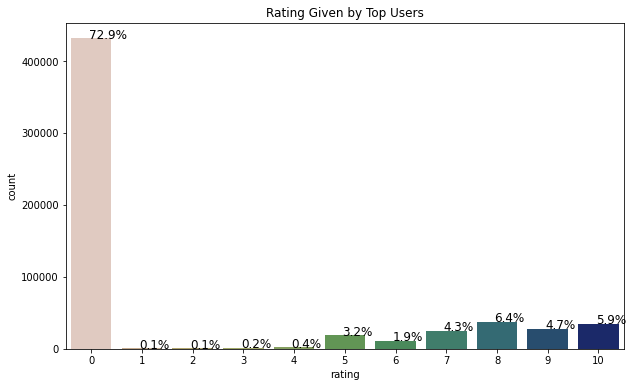

In [ ]:
# lets plot a bar graph for number of books of different ratings
plt.figure(figsize=(10,6))
ax=sns.countplot(x="rating", data=top_users,palette='gist_earth_r')
plt.title('Rating Given by Top Users')
without_hue(ax,top_users['rating'])

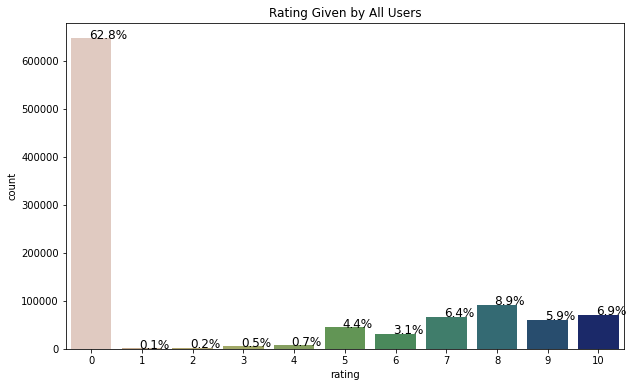

In [ ]:
# lets plot a bar graph for number of books of different ratings
plt.figure(figsize=(10,6))
ax=sns.countplot(x="rating", data=ratings,palette='gist_earth_r')
plt.title('Rating Given by All Users')
without_hue(ax,ratings['rating'])

## The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings[ratings['rating'] != 0]
ratings_implicit = ratings[ratings['rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


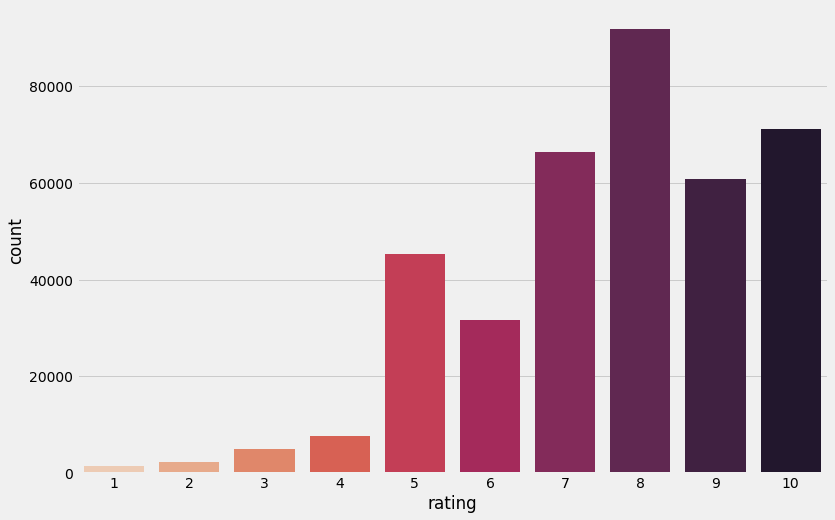

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='rating', palette='rocket_r')

##It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

## **Merging of all three Tables**
##Merging Books, Users and Rating Tables in One

In [ ]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['rating'].transform('count')

In [ ]:
# merging data set
dataset = pd.merge(books, ratings_explicit, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     383842 non-null  object 
 1   Book-Title               383842 non-null  object 
 2   Book-Author              383842 non-null  object 
 3   Year-Of-Publication      383842 non-null  int64  
 4   Publisher                383842 non-null  object 
 5   User-ID                  383842 non-null  int64  
 6   rating                   383842 non-null  int64  
 7   Avg_Rating               383842 non-null  float64
 8   Total_No_Of_Users_Rated  383842 non-null  int64  
 9   Age                      383842 non-null  int64  
 10  City                     383842 non-null  object 
 11  State                    383842 non-null  object 
 12  Country                  383842 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 41.0+ MB


In [ ]:
book_rating=dataset.groupby('Book-Title')['rating'].count().reset_index().sort_values(by='rating',ascending=False)[:15]

In [ ]:
fig = px.histogram(x= book_rating['Book-Title'],y=book_rating['rating'],orientation=None , width=850, height=600,
              text_auto=True,
             )
fig.update_layout(
    title='Top 15 books',
    xaxis_title="Books",
    yaxis_title="Number of Ratings",
    template="plotly_dark",
    
)
fig.show()

## The book that received the most rating counts in this data set is **The Lovely Bones: A Novel**

In [ ]:
dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,rating,Avg_Rating,Total_No_Of_Users_Rated,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,7.666667,9,35,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,5.000000,1,35,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,5.000000,1,35,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,5.000000,1,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,6.000000,1,35,timmins,ontario,canada


In [ ]:
dataset.shape

(383842, 13)

##**Popularity Based Filtering**

## As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

##Book weighted avg formula:
##Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
##where,
## **v** is the number of votes for the books;
## **m** is the minimum votes required to be listed in the chart;
## **R** is the average rating of the book; and
## **C** is the mean vote across the whole report.
## Now we find the values of v,m,R,C.

In [ ]:
C= dataset['Avg_Rating'].mean()
m= dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = dataset.loc[dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504972 , m=64.0


(38570, 13)

##Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
##We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('green',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)


,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


## The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

#**Model Based Collaborative Filtering Recommender**

---


##The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.
##Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.
##Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
##The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

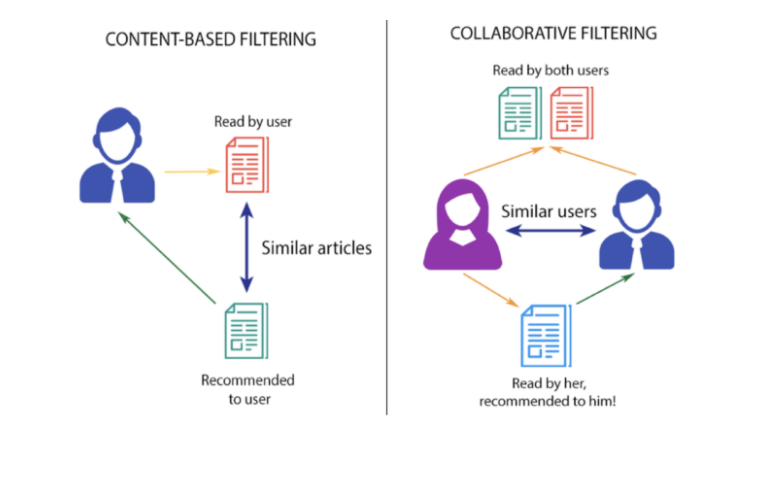

In [ ]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

##This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
##The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [ ]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [ ]:
user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


##SVD and NMF models comparison
##Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630163 sha256=a31cd3672a6431d501934d38313b1eb3033c7c407969adfca008f28e31e3b4fa
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.615985
test_mae      1.247284
fit_time     22.117647
test_time     1.807466
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.512502
test_mae      2.101204
fit_time     42.559002
test_time     1.373950
dtype: float64

##It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

# **Optimisation of SVD algorithm**
##Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
##It is used to find the best setting of parameters:
##n_factors - the number of factors
##n_epochs - the number of iteration of the SGD procedure
##lr_all - the learning rate for all parameters
##reg_all - the regularization term for all parameters
##As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6104842499922778
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


# **Analysis of Collaborative Filtering model results**
##In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
40064,191188,0345425480,9.0,7.317021,False,7.0,1.682979
6502,89361,1400031354,10.0,7.930286,False,8.0,2.069714
12494,159732,0451628144,8.0,7.588828,False,8.0,0.411172
41258,26084,0156628708,9.0,8.259872,False,8.0,0.740128
24708,11676,0590409433,7.0,7.666080,False,8.0,0.666080


##Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
##It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

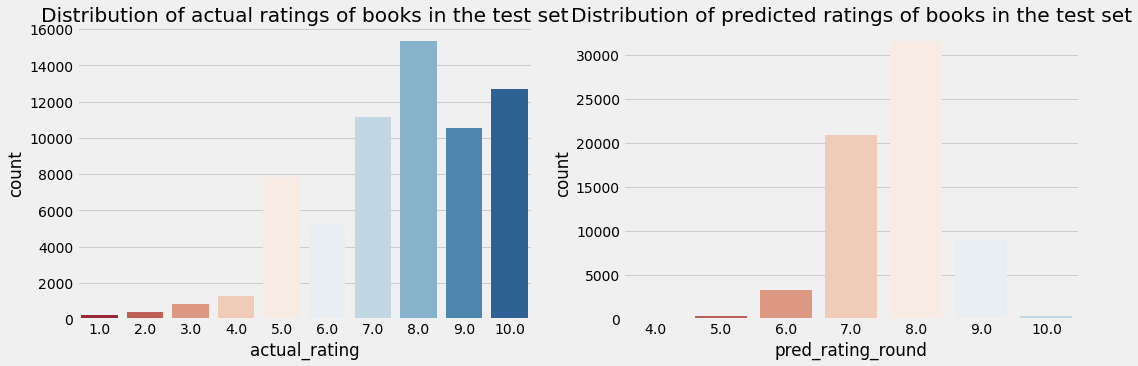

In [ ]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

## **Absolute error of predicted ratings**
## The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
## How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

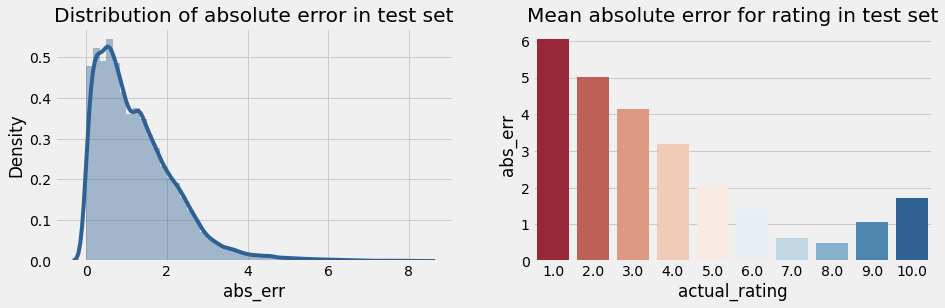

In [ ]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

##Analysis of predicted ratings of a particular user
##For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [ ]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

##Train set: Top rated books

In [ ]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['rating']>=9)].sample(10)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234959,193458,0671880314,9,8.305556,36,Schindler's List,NaN
234950,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
234890,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
234907,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN
234891,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,NaN
234896,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
234895,193458,0064471098,9,8.733333,15,The Silver Chair,NaN
234905,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
234921,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN
234963,193458,0679429220,9,7.794393,107,Midnight in the Garden of Good and Evil: A Sav...,NaN


## Test set: predicted top rated books

In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234894,193458,006447108X,9,8.833333,18,The Last Battle,8.156599
234994,193458,1853260002,10,8.217391,23,Pride &amp; Prejudice (Wordsworth Classics),8.013707
234893,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),7.980881
234987,193458,1559703237,7,8.000000,4,Trying to Save Piggy Sneed,7.679480
234947,193458,0486204871,9,8.666667,3,The Devil's Dictionary,7.638327


## Test set: actual top rated books

In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('rating', ascending=False).head(5)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234994,193458,1853260002,10,8.217391,23,Pride &amp; Prejudice (Wordsworth Classics),8.013707
234893,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),7.980881
234970,193458,0792274989,9,8.666667,3,National Geographic Photography Field Guide: S...,7.590139
234947,193458,0486204871,9,8.666667,3,The Devil's Dictionary,7.638327
234894,193458,006447108X,9,8.833333,18,The Last Battle,8.156599


## **Collaborative Filtering based Recommendation System--(User-Item Based)**

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import correlation
import operator
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
## Taking book name and Number of recommendation of book
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Enter number of books to recommend: 5


In [ ]:
df = pd.DataFrame(dataset['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = dataset.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [ ]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['rating'] = popular_book['rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','rating']].groupby(testdf['ISBN'])

In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
def printBookDetails(bookID):
    print(dataset[dataset['ISBN']==bookID]['Book-Title'].values[0])
   

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [ ]:
k = list(dataset['Book-Title'])
m = list(dataset['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Fried Green Tomatoes at the Whistle Stop Cafe


## **Correlation Based**

In [ ]:
popularity_threshold = 50

user_count = dataset['User-ID'].value_counts()
data = dataset[dataset['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['rating'].value_counts()
data = data[data['rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'rating').fillna(0)

In [ ]:
average_rating = pd.DataFrame(dataset.groupby('ISBN')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
ISBN,,
0971880107,4.390706,2502
0316666343,8.185290,1295
0385504209,8.435318,883
0060928336,7.887500,732
0312195516,8.182768,723


In [ ]:
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
1,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
2,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3,0804115613,Fried Green Tomatoes at the Whistle Stop Cafe,Fannie Flagg,2000,Ballantine Books
4,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks


## **Nearest Neighbours Based**

In [ ]:

data = (dataset.groupby(by = ['Book-Title'])['rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'rating']])
result = pd.merge(data, dataset, on='Book-Title')
result = result[result['rating_x'] >= popularity_threshold]
result = result.reset_index(drop = True)

In [ ]:
## table pivot
matrix = result.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'rating_x').fillna(0)
up_matrix = csr_matrix(matrix)

In [ ]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books:

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)


## Content Based

In [ ]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44619, 8)

In [ ]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44619, 1112)

In [ ]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44619, 44619)

In [ ]:
print("Recommended Books:\n")
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


## Hybrid Approach (Content+Collaborative) Using percentile

In [ ]:
z = list()
k = float(1/number)
for x in range(number):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=number:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
